In [1]:
# Based on a SARSA implementation downloaded from https://github.com/lazyprogrammer/machine_learning_examples/blob/master/rl/sarsa.py
# Modified and extended by Fabian Ruehle
# Explore Gridworld
import gridworld
import helperFunctions
import matplotlib.pyplot as plt
from matplotlib import animation

#from IPython.display import HTML

%matplotlib inline

In [2]:
agent = gridworld.GameEnv()
plt.imshow(agent.render_world(), animated=True)
plt.show()

TypeError: argument 1 must be sequence of length 2, not 3

In [3]:

# taking steps in the gridworld
print('starting point')
plt.imshow(agent.render_world(), animated=True)
plt.show()
print('step up')
agent.step(0)
anim=plt.imshow(agent.render_world(), animated=True)
plt.show()
print('step down')
agent.step(1)
plt.imshow(agent.render_world(), animated=True)
plt.show()
print('step right')
agent.step(3)
plt.imshow(agent.render_world(), animated=True)
plt.show()
print('step left')
agent.step(2)
plt.imshow(agent.render_world(), animated=True)
plt.show()

starting point


NameError: name 'agent' is not defined

In [51]:
########################################################################################################################
#                                Part 1: Play the game once to see an untrained agent at work                          #
########################################################################################################################
agent.reset()
agent.close_world_display()
print("Let the game begin...")

# generate all states
all_states = []
for x in range(agent.sizeX):
    for y in range(agent.sizeY):
        all_states.append((x, y))

# Q is a dictionary that contains the rewards for all four actions that can be performed in any given square of Gridworld.
# Initialize Q and keep track of how many times Q[s] has been updated
Q = {}
update_counts_sa = {}
for s in all_states:
    update_counts_sa[s] = {}
    Q[s] = {}
    for a in agent.action_space:
        update_counts_sa[s][a] = 1.0
        Q[s][a] = 0.0

gamma = 0.9  # discount factor
alpha_W = 0.1  # learning rate
t = 1.0  # count time

Q

Let the game begin...


{(0, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 5): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 6): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 7): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 8): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 5): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 6): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 7): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 8): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (2, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (2, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (2, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (2, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (2, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (2, 5): {0

In [52]:
########################################################################################################################

# To start the algorithm we need any action, so we pick one randomly until we find a valid action which we perform
found_initial_move = False
current_action = None
current_state = agent.get_state()
while not found_initial_move:
    current_action = helperFunctions.random_action(None, agent.action_space, eps=1)
    found_initial_move = agent.is_possible_action(current_action)


# loop until done (i.e. solved the maze or gave up)
done = False
i=0
while not done:
    print(i)
    i=i+1
    # perform current step and get the next state, the reward/penalty for the move, and whether the agent is done (solved or gave up)
    next_state, reward, done = agent.step(current_action, False)

    # get the best currently known action for the state we are in now
    next_action = helperFunctions.get_best_action(Q[current_state])[0]
    # randomize action to allow for exploration. As time progresses, make random actions less likely.
    next_action = helperFunctions.random_action(next_action, agent.action_space, eps=0.4/t)

    # Update Q
    alpha = alpha_W/update_counts_sa[current_state][current_action]
    update_counts_sa[current_state][current_action] += 0.005
    #print(Q[current_state][current_action])
    Q[current_state][current_action] = Q[current_state][current_action] + alpha*(reward + gamma*Q[next_state][next_action] - Q[current_state][current_action])
    print([current_state,current_action,Q[current_state][current_action]])
    
    # update current state, current action, and start over
    current_state = next_state
    current_action = next_action
    t += 0.001

0
[(2, 5), 1, -0.1]
1
[(2, 6), 0, -0.1]
2
[(2, 5), 2, -0.1]
3
[(1, 5), 1, -0.1]
4
[(1, 6), 1, -0.1]
5
[(1, 7), 3, -0.1]
6
[(2, 7), 0, -0.10900000000000001]
7
[(2, 6), 0, -0.19850746268656722]
8
[(2, 5), 1, -0.20732902650924484]
9
[(2, 6), 0, -0.27786315945027346]
10
[(2, 5), 3, -0.1]
11
[(3, 5), 0, -0.1]
12
[(3, 4), 0, -0.1]
13
[(3, 3), 0, -0.1]
14
[(3, 2), 1, -0.10900000000000001]
15
[(3, 3), 0, -0.18955223880597016]
16
[(3, 2), 2, -5.0]
17
[(2, 2), 3, -0.55]
18
[(3, 2), 2, -9.526865671641792]
19
[(2, 2), 3, -0.5947761194029851]
20
[(3, 2), 0, -0.1]
21
[(3, 1), 0, -0.1]
22
[(3, 0), 0, -0.2]
23
[(3, 0), 2, -0.1]
24
[(2, 0), 3, -0.1]
25
[(3, 0), 3, -0.1]
26
[(4, 0), 1, -0.1]
27
[(4, 1), 1, -0.1]
28
[(4, 2), 1, 10.0]


Watch my exploration route... (close the plot window to contine)


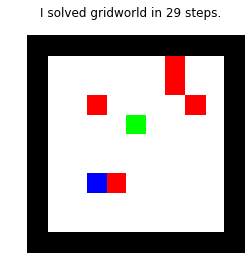

In [53]:
########################################################################################################################
#                          Part 2: Show the exploration route taken by the untrained worker                            #
########################################################################################################################

# show exploration route
result = ""
if not agent.gave_up:
    result = "I solved gridworld in " + str(agent.steps) + " steps."
else:
    result = "Sorry, I had to give up after " + str(agent.max_steps) + " steps."

# Animate the steps of the first game
print("Watch my exploration route... (close the plot window to contine)")
helperFunctions.animate_steps(agent, "Gridworld exploration untrained worker", result)

In [54]:
Q

{(0, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 5): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 6): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 7): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (0, 8): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 4): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (1, 5): {0: 0.0, 1: -0.1, 2: 0.0, 3: 0.0},
 (1, 6): {0: 0.0, 1: -0.1, 2: 0.0, 3: 0.0},
 (1, 7): {0: 0.0, 1: 0.0, 2: 0.0, 3: -0.1},
 (1, 8): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (2, 0): {0: 0.0, 1: 0.0, 2: 0.0, 3: -0.1},
 (2, 1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (2, 2): {0: 0.0, 1: 0.0, 2: 0.0, 3: -0.5947761194029851},
 (2, 3): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0},
 (2, 4): {0: 0.0, 1: 0.0, 2: 0.0, 

In [55]:

########################################################################################################################
#                        Part 3: Play the game 10 000 times to learn the best solution strategy                        #
########################################################################################################################

print("Now let me train for a while, I enjoyed the game so much!")

agent.reset()
plt.close('all')

# The code is essentially identical to the one used above, but now carried out 10 000 times
training_episodes = 10000
for i in range(training_episodes):
    if i % 1000 == 0:
        print("I'm playing game " + str(i) + " / " + str(training_episodes))
    if i % 100 == 0:
        t += 0.01
    agent.reset()
    found_initial_move = False
    current_action = None
    current_state = agent.get_state()
    while not found_initial_move:
        current_action = helperFunctions.random_action(None, agent.action_space, eps=1)
        found_initial_move = agent.is_possible_action(current_action)
    done = False

    # loop until done (i.e. solved the maze or gave up)
    while not done:
        # perform current step and get the next state, the reward/penalty for the move, and whether the agent is done (solved or gave up)
        next_state, reward, done = agent.step(current_action, False)

        # get the best currently known action for the state we are in now
        next_action = helperFunctions.get_best_action(Q[current_state])[0]
        # randomize action to allow for exploration. As time progresses, make random actions less likely.
        next_action = helperFunctions.random_action(next_action, agent.action_space, eps=0.4/t)

        # Update Q
        alpha = alpha_W / update_counts_sa[current_state][current_action]
        update_counts_sa[current_state][current_action] += 0.005
        Q[current_state][current_action] = Q[current_state][current_action] + alpha * (reward + gamma * Q[next_state][next_action] - Q[current_state][current_action])

        # update current state, current action, and start over
        current_state = next_state
        current_action = next_action

print("Ok, I am done practicing.")
agent.reset()
plt.close('all')


Now let me train for a while, I enjoyed the game so much!
I'm playing game 0 / 10000
I'm playing game 1000 / 10000
I'm playing game 2000 / 10000
I'm playing game 3000 / 10000
I'm playing game 4000 / 10000
I'm playing game 5000 / 10000
I'm playing game 6000 / 10000
I'm playing game 7000 / 10000
I'm playing game 8000 / 10000
I'm playing game 9000 / 10000
Ok, I am done practicing.


In [56]:
Q

{(0, 0): {0: -4.567974420488694,
  1: -4.171778664574773,
  2: -3.962832493809789,
  3: -2.5845026395564235},
 (0, 1): {0: -4.097273065615752,
  1: 2.6663898576964344,
  2: -4.695396518010581,
  3: -5.003525134099621},
 (0, 2): {0: -2.4600010632442277,
  1: 15.708564311240506,
  2: -0.4886145288076955,
  3: -14.93020987865046},
 (0, 3): {0: -9.795498310445591,
  1: 28.710334195756133,
  2: 27.04584304962461,
  3: 42.93969460613955},
 (0, 4): {0: 33.88734779884168,
  1: 17.407457485990914,
  2: 30.03168707407687,
  3: 41.480544224776935},
 (0, 5): {0: 31.210389143540255,
  1: 1.7983749009554464,
  2: 12.953199741415641,
  3: 31.93033314447302},
 (0, 6): {0: 19.109293041499757,
  1: -4.213990255834952,
  2: -2.55843148476749,
  3: 16.083241943946756},
 (0, 7): {0: 0.9665021733657254,
  1: -5.325216784725441,
  2: -5.160091510154062,
  3: -4.883135026392645},
 (0, 8): {0: -4.341939180702387,
  1: -5.672047134290001,
  2: -6.12635176458107,
  3: -5.359683100220915},
 (1, 0): {0: -2.4938010

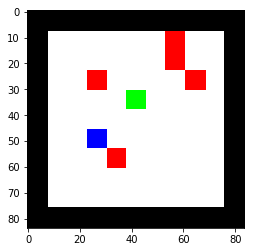

In [57]:
plt.imshow(agent.render_world(), animated=True)
plt.show()